In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key


In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a8f0f0dd44c67317fb1e4cd99d9d4140


In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

saskylakh ru
sitka us
avarua ck
narsaq gl
ribeira grande pt
fortuna us
chagda ru
bambous virieux mu
rikitea pf
nichinan jp
ushuaia ar
jamestown sh
port-cartier ca
barentsburg sj
khatanga ru
constitucion mx
hofn is
aitape pg
saldanha za
podgorodnyaya pokrovka ru
martapura id
bluff nz
namibe ao
tasiilaq gl
kamenskoye ru
la ronge ca
hobart au
butaritari ki
roald no
severo-kurilsk ru
amderma ru
hermanus za
tutoia br
barentsburg sj
saint george bm
illoqqortoormiut gl
portpatrick gb
mananara mg
mys shmidta ru
port alfred za
upernavik gl
saskylakh ru
mataura pf
mataura pf
georgetown sh
punta arenas cl
la ronge ca
vaini to
bumba cd
isangel vu
hilo us
taolanaro mg
rio grande br
guerrero negro mx
marsabit ke
rikitea pf
maceio br
barentsburg sj
lorengau pg
avarua ck
strezhevoy ru
danjiangkou cn
cayenne gf
moengo sr
punta arenas cl
georgetown sh
moiyabana bw
castro cl
prnjavor ba
mar del plata ar
nagar karnul in
sentyabrskiy ru
puerto escondido mx
korcula hr
sangar ru
talaya ru
butaritari ki
alban

waingapu id
margate za
sitka us
novobiryusinskiy ru
lata sb
new norfolk au
ushuaia ar
carnarvon au
torbay ca
castro cl
tsihombe mg
amderma ru
warrnambool au
qaanaaq gl
grand gaube mu
hami cn
tiksi ru
klaksvik fo
thompson ca
mataura pf
pangnirtung ca
san cristobal ec
barrow us
burica pa
provideniya ru
chunoyar ru
longonjo ao
alexandria eg
kapaa us
bredasdorp za
illoqqortoormiut gl
urubicha bo
saint-philippe re
luderitz na
latur in
carnarvon au
yellowknife ca
itaituba br
mataura pf
clyde river ca
pisco pe
marcona pe
mataura pf
kaputa zm
barentsburg sj
east london za
kayes ml
illoqqortoormiut gl
yellowknife ca
carnarvon au
carnarvon au
shaunavon ca
rikitea pf
jamestown sh
kamaishi jp
bengkulu id
ushuaia ar
damietta eg
rio grande br
berlevag no
thompson ca
hovd mn
semnan ir
leh in
mount hagen pg
sovetskiy ru
airai pw
illoqqortoormiut gl
vestmannaeyjar is
arraial do cabo br
barrow us
la ronge ca
cherskiy ru
plastun ru
albany au
hermagor at
cape town za
amderma ru
samana do
avarua ck
maraba 

georgetown sh
bayan kw
pilar py
busselton au
carnarvon au
albany au
rikitea pf
punta arenas cl
khormuj ir
saint george bm
albany au
naregal in
taolanaro mg
mar del plata ar
castro cl
schoningen de
hilo us
norman wells ca
pitimbu br
sola vu
norman wells ca
punta arenas cl
rikitea pf
atuona pf
jamestown sh
hermanus za
grand river south east mu
coahuayana mx
taolanaro mg
samusu ws
san patricio mx
kodiak us
lagoa pt
danville us
albany au
albany au
yarada in
amapa br
ponta do sol cv
saint-philippe re
coihaique cl
nanortalik gl
indianola us
kapaa us
hun ly
saint-augustin ca
taolanaro mg
thompson ca
labuhan id
umm lajj sa
qaanaaq gl
eureka us
punta arenas cl
marfino ru
victoria sc
kapaa us
poum nc
bad neustadt de
albany au
mar del plata ar
entre rios bo
kodiak us
tirumala in
ushuaia ar
wasilla us
zachagansk kz
saint george bm
punta arenas cl
hilo us
codrington ag


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | chagda
City not found. Skipping...
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | nichinan
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | port-cartier
Processing Record 14 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | aitape
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | podgorodnyaya pokrovka
Processing Record 21 of Set 1 | martapura
Processin

Processing Record 37 of Set 4 | yellowknife
Processing Record 38 of Set 4 | ballina
Processing Record 39 of Set 4 | aljezur
Processing Record 40 of Set 4 | kautokeino
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | burica
City not found. Skipping...
Processing Record 43 of Set 4 | hunza
City not found. Skipping...
Processing Record 44 of Set 4 | matamoros
Processing Record 45 of Set 4 | malanje
Processing Record 46 of Set 4 | bongandanga
Processing Record 47 of Set 4 | sterling
Processing Record 48 of Set 4 | saleaula
City not found. Skipping...
Processing Record 49 of Set 4 | egvekinot
Processing Record 50 of Set 4 | sola
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | san ignacio
Processing Record 4 of Set 5 | vardo
Processing Record 5 of Set 5 | yebaishou
Processing Record 6 of Set 5 | solwezi
Processing Record 7 of Set 5 | richards bay
Processing Reco

Processing Record 24 of Set 8 | alexandria
Processing Record 25 of Set 8 | urubicha
Processing Record 26 of Set 8 | latur
Processing Record 27 of Set 8 | itaituba
Processing Record 28 of Set 8 | pisco
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | kaputa
Processing Record 31 of Set 8 | kayes
Processing Record 32 of Set 8 | shaunavon
Processing Record 33 of Set 8 | kamaishi
Processing Record 34 of Set 8 | damietta
Processing Record 35 of Set 8 | berlevag
Processing Record 36 of Set 8 | hovd
Processing Record 37 of Set 8 | semnan
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | mount hagen
Processing Record 40 of Set 8 | sovetskiy
Processing Record 41 of Set 8 | plastun
Processing Record 42 of Set 8 | hermagor
Processing Record 43 of Set 8 | samana
Processing Record 44 of Set 8 | maraba
Processing Record 45 of Set 8 | bytow
Processing Record 46 of Set 8 | corn island
Processing Record 47 of Set 8 | mahebourg
Processi

Processing Record 15 of Set 12 | nguiu
City not found. Skipping...
Processing Record 16 of Set 12 | saint-louis
Processing Record 17 of Set 12 | alghero
Processing Record 18 of Set 12 | kawalu
Processing Record 19 of Set 12 | chilliwack
Processing Record 20 of Set 12 | darhan
Processing Record 21 of Set 12 | alugan
Processing Record 22 of Set 12 | fernley
Processing Record 23 of Set 12 | mingguang
Processing Record 24 of Set 12 | novaya zaimka
Processing Record 25 of Set 12 | champerico
Processing Record 26 of Set 12 | amapa
Processing Record 27 of Set 12 | masjed-e soleyman
City not found. Skipping...
Processing Record 28 of Set 12 | banda aceh
Processing Record 29 of Set 12 | pedra azul
Processing Record 30 of Set 12 | port macquarie
Processing Record 31 of Set 12 | muisne
Processing Record 32 of Set 12 | kavieng
Processing Record 33 of Set 12 | balkanabat
Processing Record 34 of Set 12 | leningradskiy
Processing Record 35 of Set 12 | junction city
Processing Record 36 of Set 12 | ba

In [10]:
len(city_data)


569

In [12]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-12.06,98,100,5.70,RU,2022-01-24 20:06:57
1,Sitka,57.0531,-135.3300,39.09,87,100,8.05,US,2022-01-24 20:06:58
2,Avarua,-21.2078,-159.7750,82.45,89,40,9.22,CK,2022-01-24 20:06:58
3,Narsaq,60.9167,-46.0500,28.62,93,100,8.93,GL,2022-01-24 20:04:32
4,Ribeira Grande,38.5167,-28.7000,59.40,67,20,5.75,PT,2022-01-24 20:06:59
5,Fortuna,40.5982,-124.1573,61.93,59,26,1.01,US,2022-01-24 20:07:00
6,Bambous Virieux,-20.3428,57.7575,77.22,63,47,19.51,MU,2022-01-24 20:07:01
7,Rikitea,-23.1203,-134.9692,78.49,71,100,19.89,PF,2022-01-24 20:07:01
8,Nichinan,31.6000,131.3667,50.58,85,100,8.50,JP,2022-01-24 20:07:02
9,Ushuaia,-54.8000,-68.3000,55.02,62,75,27.63,AR,2022-01-24 20:04:17


In [13]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2022-01-24 20:06:57,71.9167,114.0833,-12.06,98,100,5.70
1,Sitka,US,2022-01-24 20:06:58,57.0531,-135.3300,39.09,87,100,8.05
2,Avarua,CK,2022-01-24 20:06:58,-21.2078,-159.7750,82.45,89,40,9.22
3,Narsaq,GL,2022-01-24 20:04:32,60.9167,-46.0500,28.62,93,100,8.93
4,Ribeira Grande,PT,2022-01-24 20:06:59,38.5167,-28.7000,59.40,67,20,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1643055908.603014

In [17]:
today = time.strftime('%x')

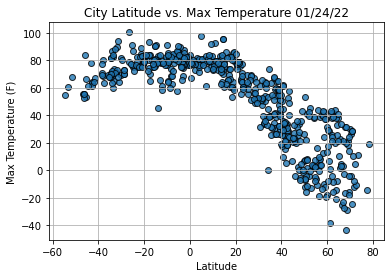

In [18]:
#build scatter plot for latitude vs. max temp
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

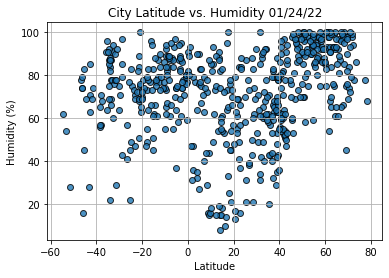

In [19]:
#build scatter plot for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

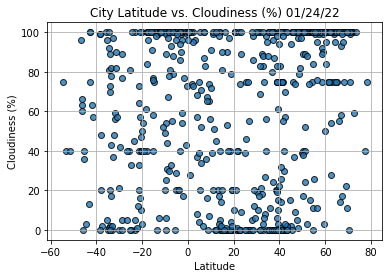

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

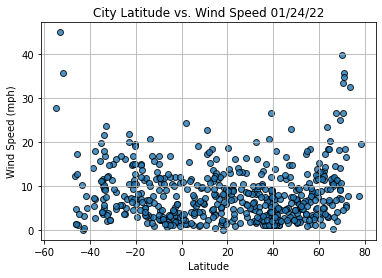

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'plot_linear_regression' is not defined

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [1]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

SyntaxError: unexpected EOF while parsing (755688848.py, line 3)